In [2]:
print("hello")

hello


In [3]:
import kagglehub
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/benas/Documents/Research/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:

print("PyTorchversion", torch.__version__)
print("Numpy version", np.__version__)
print("Pandas version", pd.__version__)

PyTorchversion 2.8.0
Numpy version 2.0.2
Pandas version 2.3.3


In [69]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
  
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes
    

In [6]:
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")
print("Path to dataset files:", path)

dataset = PlayingCardDataset(
    data_dir='/Users/benas/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train'
    )


Path to dataset files: /Users/benas/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2


In [7]:
len(dataset)

7624

In [70]:
image, label = dataset[6000]
image

tensor([[[0.9843, 0.9882, 0.9961,  ..., 0.9255, 0.9451, 0.9529],
         [0.9922, 0.9922, 0.9961,  ..., 0.8902, 0.9059, 0.9137],
         [1.0000, 0.9961, 0.9882,  ..., 0.8510, 0.8627, 0.8667],
         ...,
         [0.9961, 0.9922, 0.9843,  ..., 0.8784, 0.8706, 0.8667],
         [0.9922, 0.9882, 0.9922,  ..., 0.8745, 0.8667, 0.8627],
         [0.9882, 0.9882, 0.9961,  ..., 0.8745, 0.8667, 0.8627]],

        [[0.9843, 0.9882, 0.9961,  ..., 0.9255, 0.9451, 0.9529],
         [0.9922, 0.9922, 0.9961,  ..., 0.8902, 0.9098, 0.9176],
         [1.0000, 0.9961, 0.9882,  ..., 0.8549, 0.8667, 0.8706],
         ...,
         [0.9961, 0.9922, 0.9882,  ..., 0.8824, 0.8745, 0.8706],
         [0.9922, 0.9882, 0.9922,  ..., 0.8784, 0.8706, 0.8667],
         [0.9882, 0.9882, 0.9961,  ..., 0.8784, 0.8706, 0.8667]],

        [[0.9843, 0.9882, 0.9961,  ..., 0.9098, 0.9373, 0.9451],
         [0.9922, 0.9922, 0.9961,  ..., 0.8745, 0.8941, 0.9020],
         [1.0000, 0.9961, 0.9882,  ..., 0.8353, 0.8471, 0.

In [71]:
data_dir = '/Users/benas/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train'
target_to_class = {v:k for k, v in ImageFolder(data_dir).class_to_idx.items()}
target_to_class


{0: 'ace of clubs',
 1: 'ace of diamonds',
 2: 'ace of hearts',
 3: 'ace of spades',
 4: 'eight of clubs',
 5: 'eight of diamonds',
 6: 'eight of hearts',
 7: 'eight of spades',
 8: 'five of clubs',
 9: 'five of diamonds',
 10: 'five of hearts',
 11: 'five of spades',
 12: 'four of clubs',
 13: 'four of diamonds',
 14: 'four of hearts',
 15: 'four of spades',
 16: 'jack of clubs',
 17: 'jack of diamonds',
 18: 'jack of hearts',
 19: 'jack of spades',
 20: 'joker',
 21: 'king of clubs',
 22: 'king of diamonds',
 23: 'king of hearts',
 24: 'king of spades',
 25: 'nine of clubs',
 26: 'nine of diamonds',
 27: 'nine of hearts',
 28: 'nine of spades',
 29: 'queen of clubs',
 30: 'queen of diamonds',
 31: 'queen of hearts',
 32: 'queen of spades',
 33: 'seven of clubs',
 34: 'seven of diamonds',
 35: 'seven of hearts',
 36: 'seven of spades',
 37: 'six of clubs',
 38: 'six of diamonds',
 39: 'six of hearts',
 40: 'six of spades',
 41: 'ten of clubs',
 42: 'ten of diamonds',
 43: 'ten of hear

In [10]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
data_dir = '/Users/benas/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train'
dataset = PlayingCardDataset(data_dir, transform)

In [45]:
image, label = dataset[10]
label
image.shape

torch.Size([3, 128, 128])

In [12]:
for image, label in dataset:
    break

In [13]:
dataloader = DataLoader(dataset, batch_size = 32, shuffle=True)

In [50]:
for images, labels in dataloader:
    break

In [51]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [16]:
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCardClassifer, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [52]:
model = SimpleCardClassifer(num_classes= 53)
print(model)

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (aa): Identity()
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (c

In [68]:
model(images)

tensor([[ -6.3750,  -3.0210,  -0.9193,  -5.2247,  -4.6525,  -3.8869,  -2.4305,
          -5.8186,  -5.1190,  -2.6241,  -2.9709,  -4.8944,  -5.9685,  -1.7976,
           1.4766,  -4.2642,  -4.5334,  -3.2377,  -0.8968,  -6.3585,  -2.4934,
          -6.7869,  -1.3941,  -1.9803,  -5.1428,  -4.1806,  -0.8717,   1.0223,
          -7.1660,  -6.4998,  -2.0891,  -3.1042,  -6.8738,  -3.7031,  -0.3557,
           1.0041,  -3.4748,  -4.9736,  -1.2070,   1.1841,  -6.0041,  -4.6472,
          -0.4731,  -2.8822,  -5.7590,  -5.5508,   1.7797,   1.7741,  -2.9136,
          -2.0849,   7.6622,   9.5860,  -0.4454],
        [-11.1675,  -9.3291,  -0.7884,  -7.6422,  -9.4228,  -9.1122,  -5.7709,
          -9.9825,  -6.9917,  -8.1541,  -3.8748,  -5.0158, -11.5454, -11.2791,
          -1.5910,  -9.4853,  -6.6682,  -9.9212,  -3.9177, -11.8357,  -5.8691,
         -11.4131,  -5.5093,  -2.8793,  -7.4343,  -9.9789,  -7.8717,  -0.7697,
         -12.7683, -12.4580,  -8.5827,  -3.8246, -11.0409,  -7.1679,  -7.0120,
  

In [19]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = '/Users/benas/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train'
valid_folder = '/Users/benas/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/valid'
test_folder = '/Users/benas/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [53]:

print(torch.cuda.is_available())

False


In [61]:
import torch
from tqdm import tqdm
print(torch.backends.mps.is_available())

device = torch.device("mps")
print(device)
num_epochs = 5
train_losses, val_losses = [], []

model = SimpleCardClassifer(num_classes=53)
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

True
mps


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 16.51it/s]


Epoch 1/5 - Train loss: 1.5764132135812534, Validation loss: 0.4201784196889625


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 17.77it/s]


Epoch 2/5 - Train loss: 0.5538606298119925, Validation loss: 0.2526975244283676


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 17.02it/s]


Epoch 3/5 - Train loss: 0.33461248174169006, Validation loss: 0.17846069853260832


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 16.90it/s]


Epoch 4/5 - Train loss: 0.2558304664658349, Validation loss: 0.1853305659204159


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 17.65it/s]

Epoch 5/5 - Train loss: 0.18472002665165338, Validation loss: 0.07814867336232707


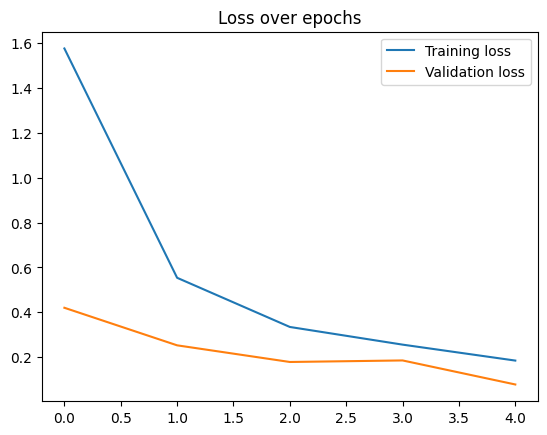

In [72]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

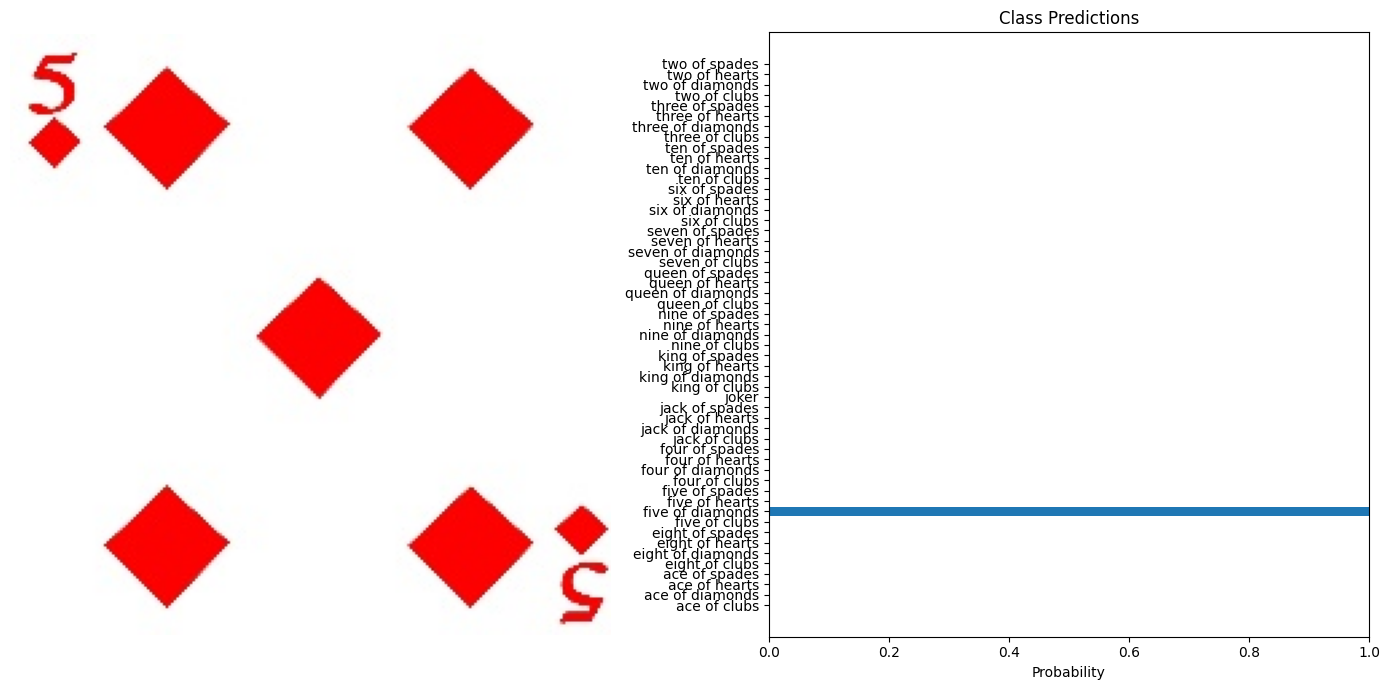

In [64]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Example usage
test_image = '/Users/benas/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/test/five of diamonds/2.jpg'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes 
visualize_predictions(original_image, probabilities, class_names)


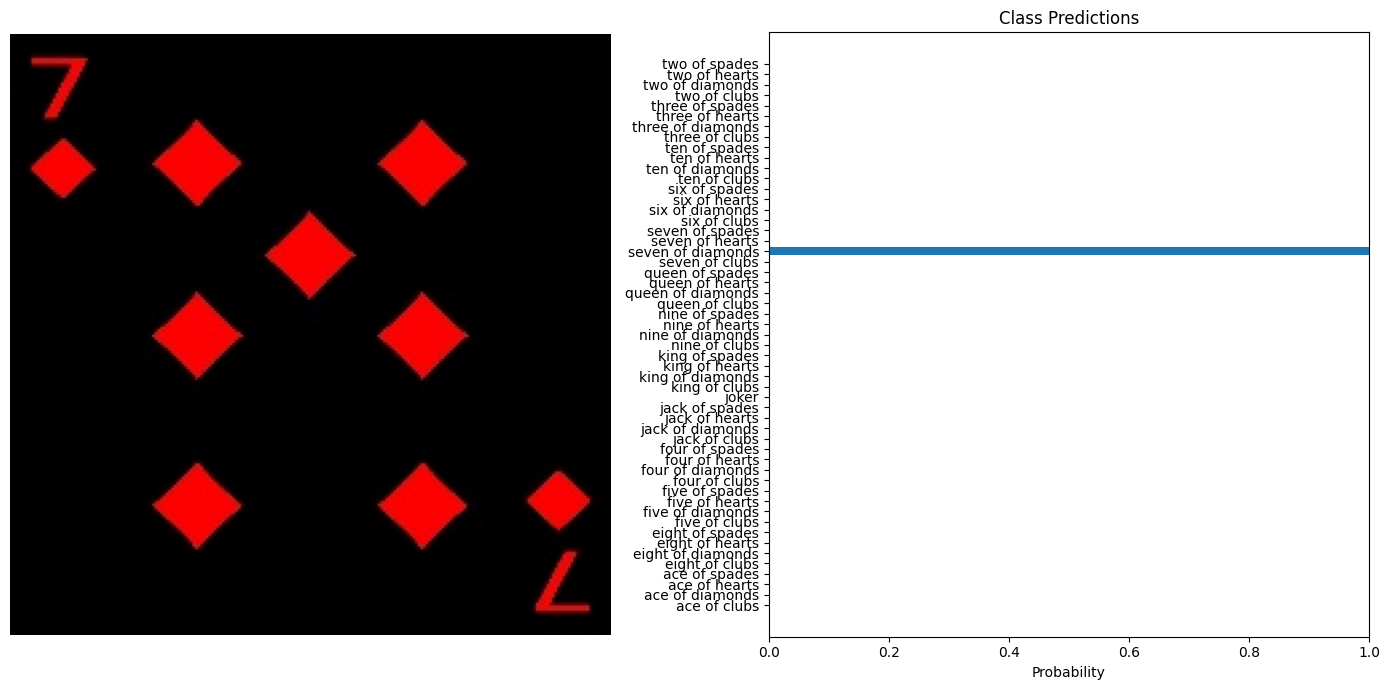

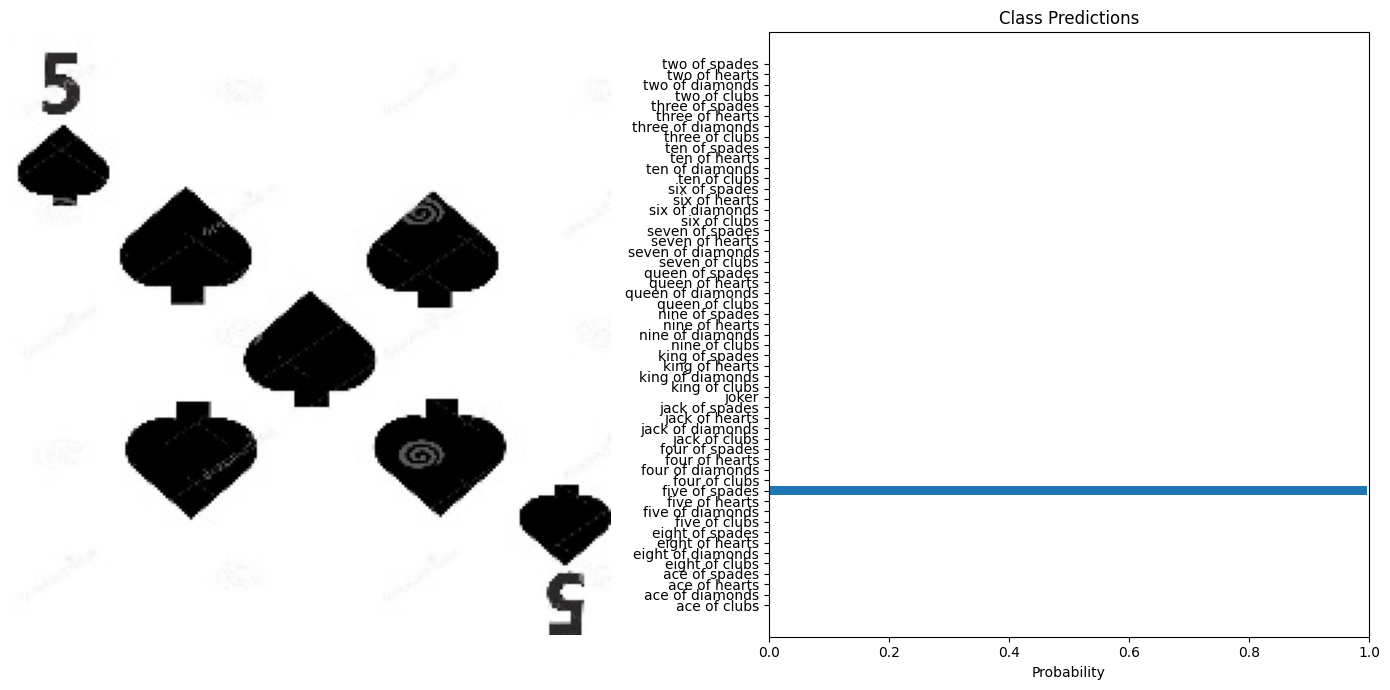

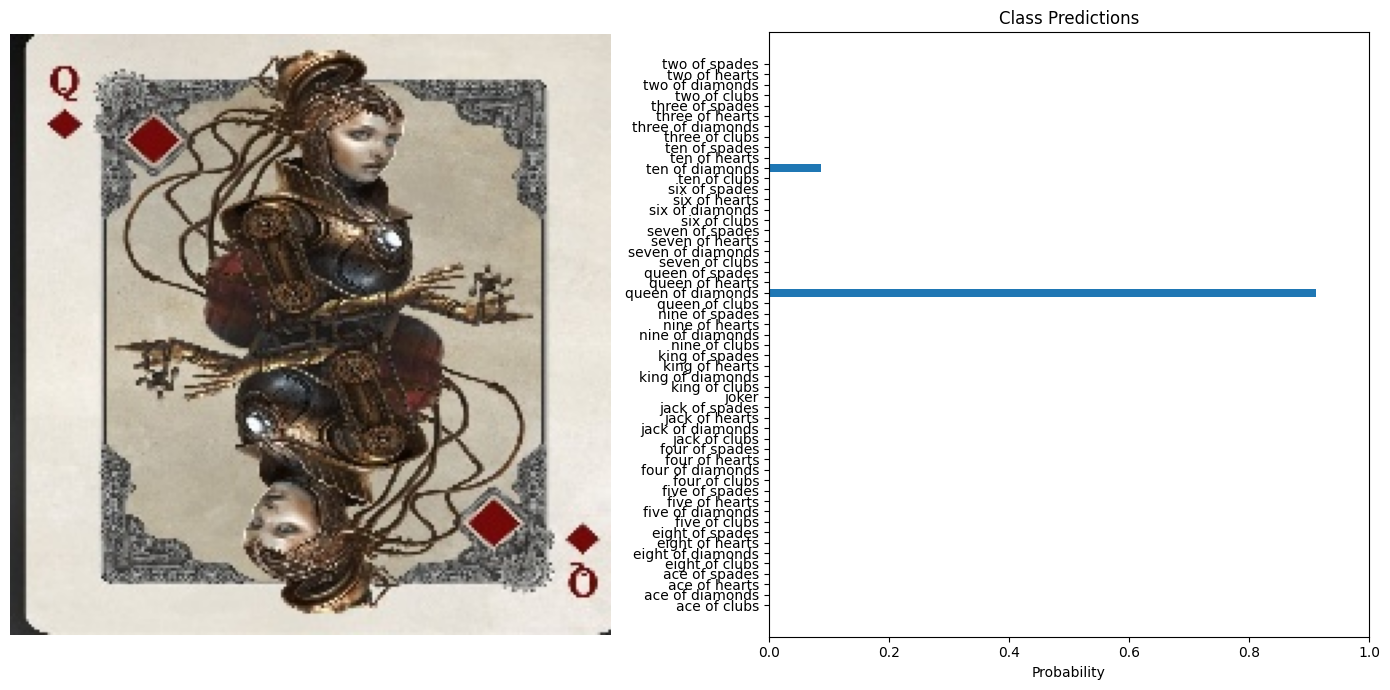

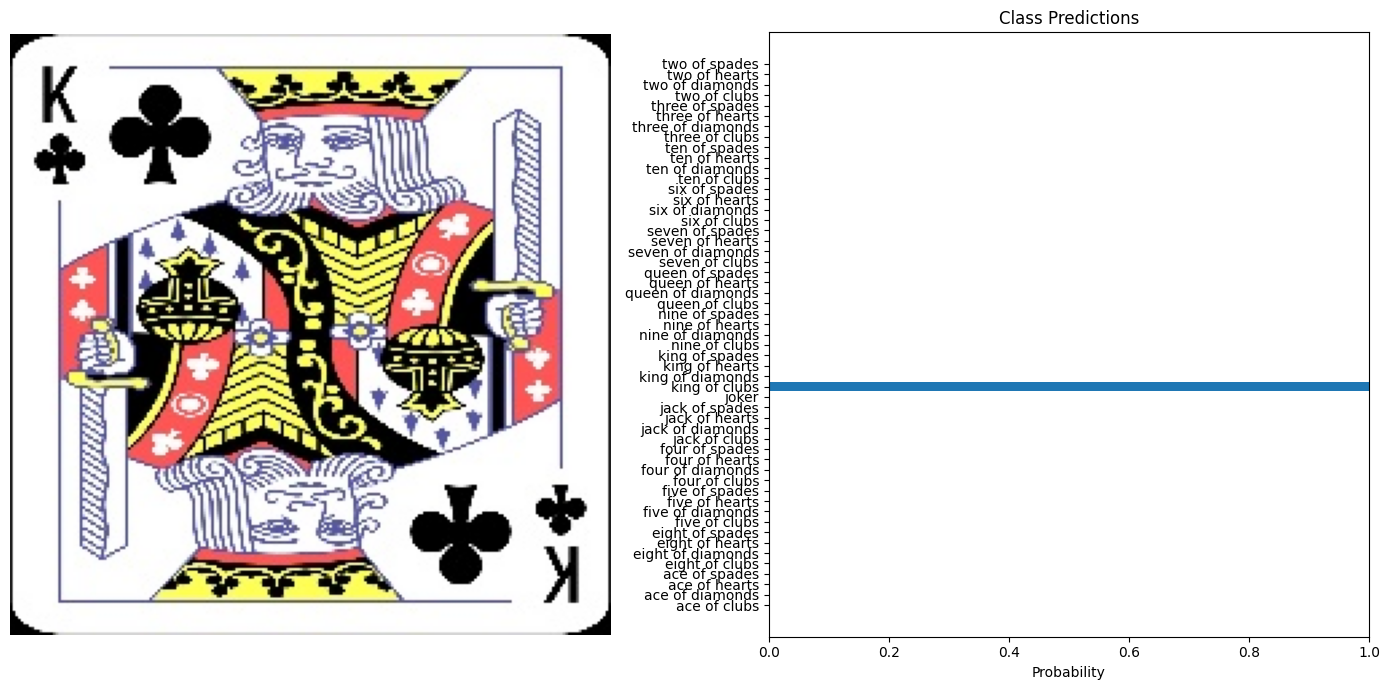

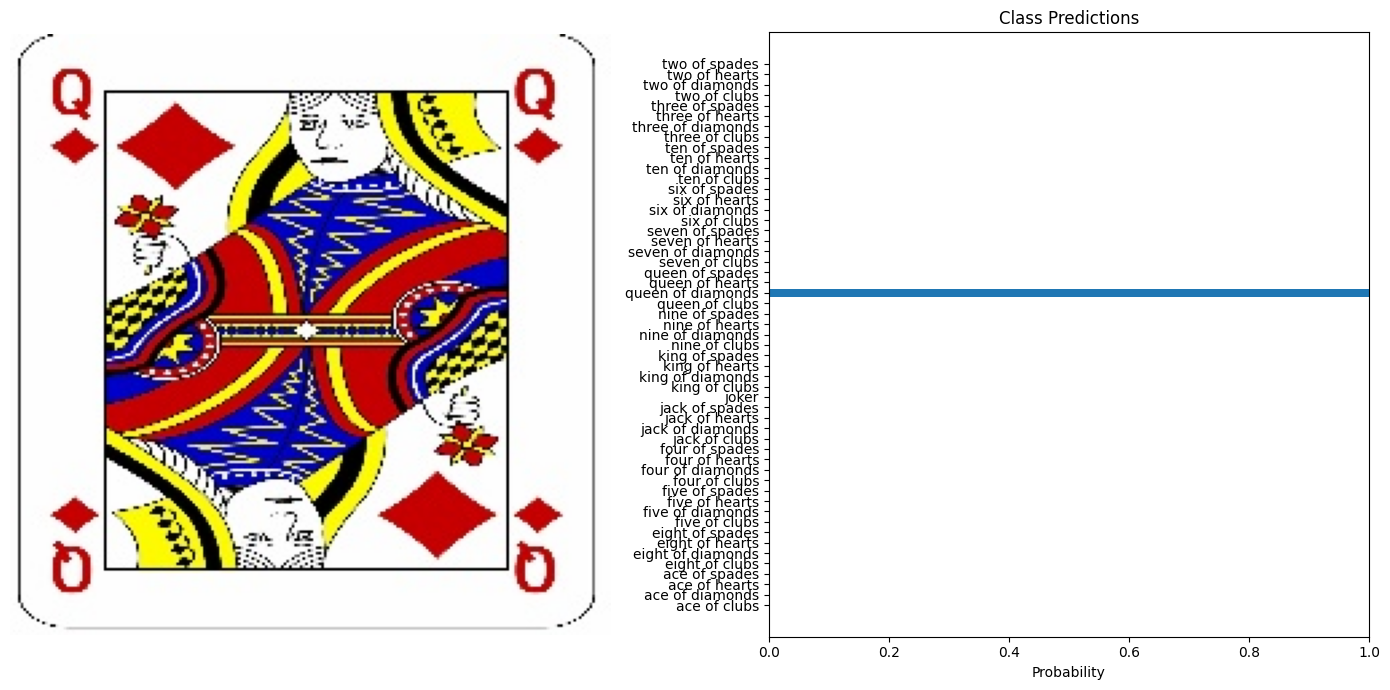

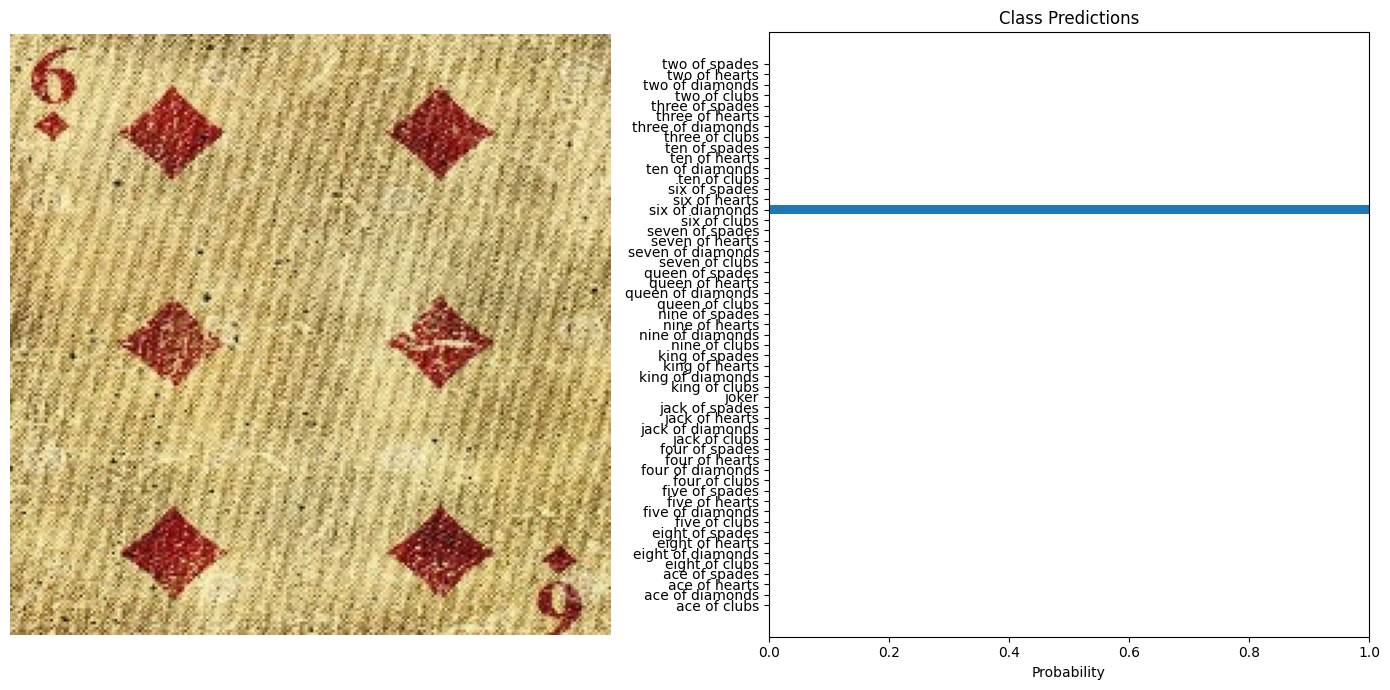

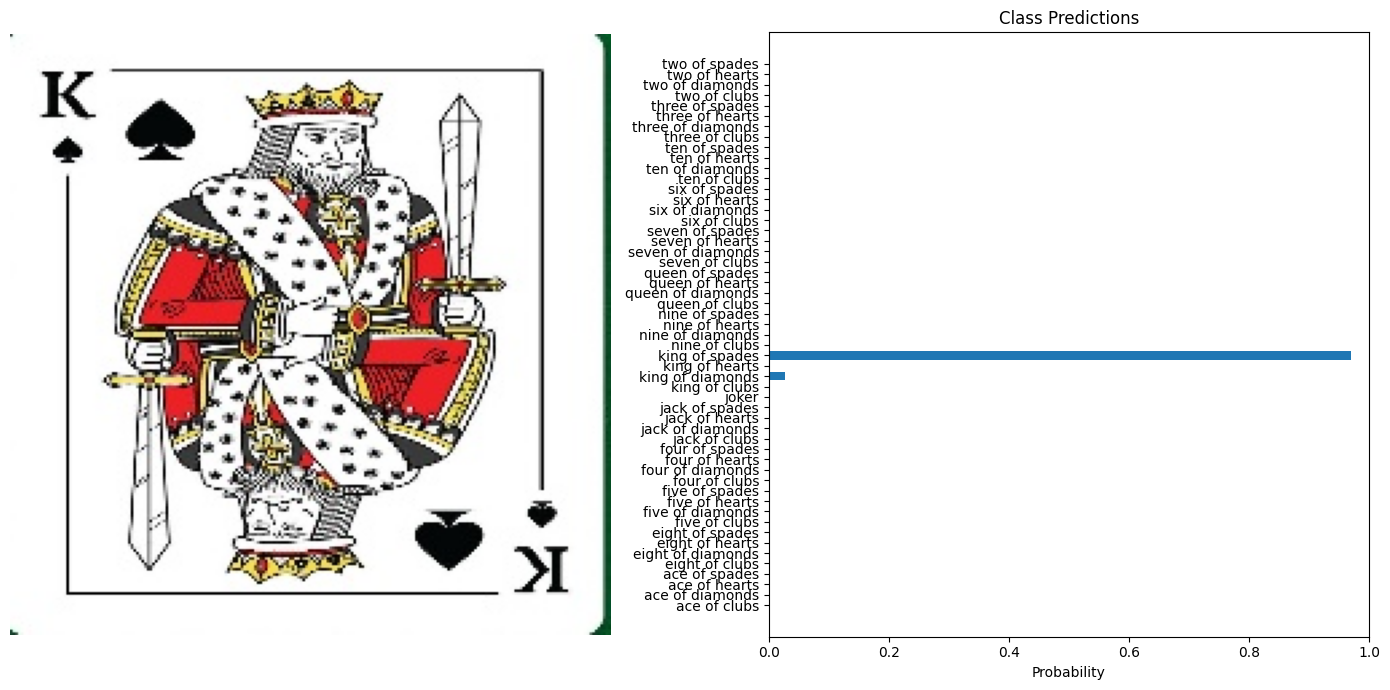

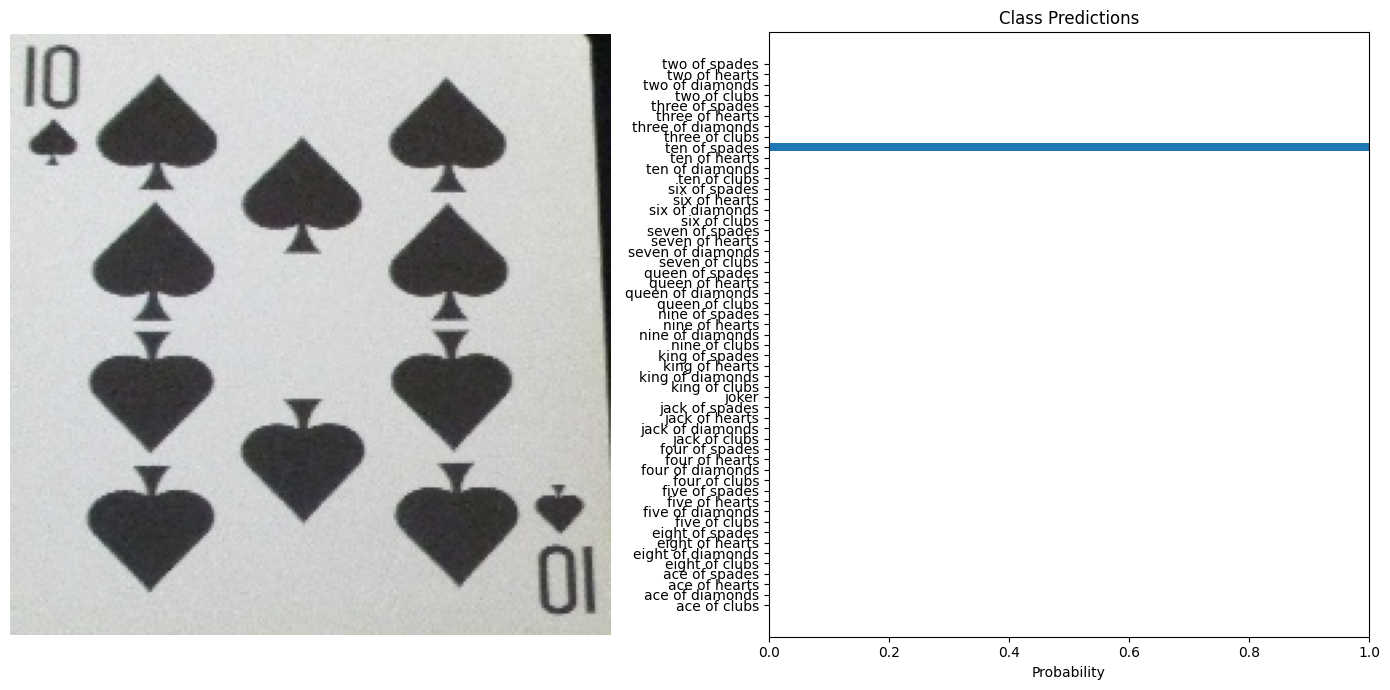

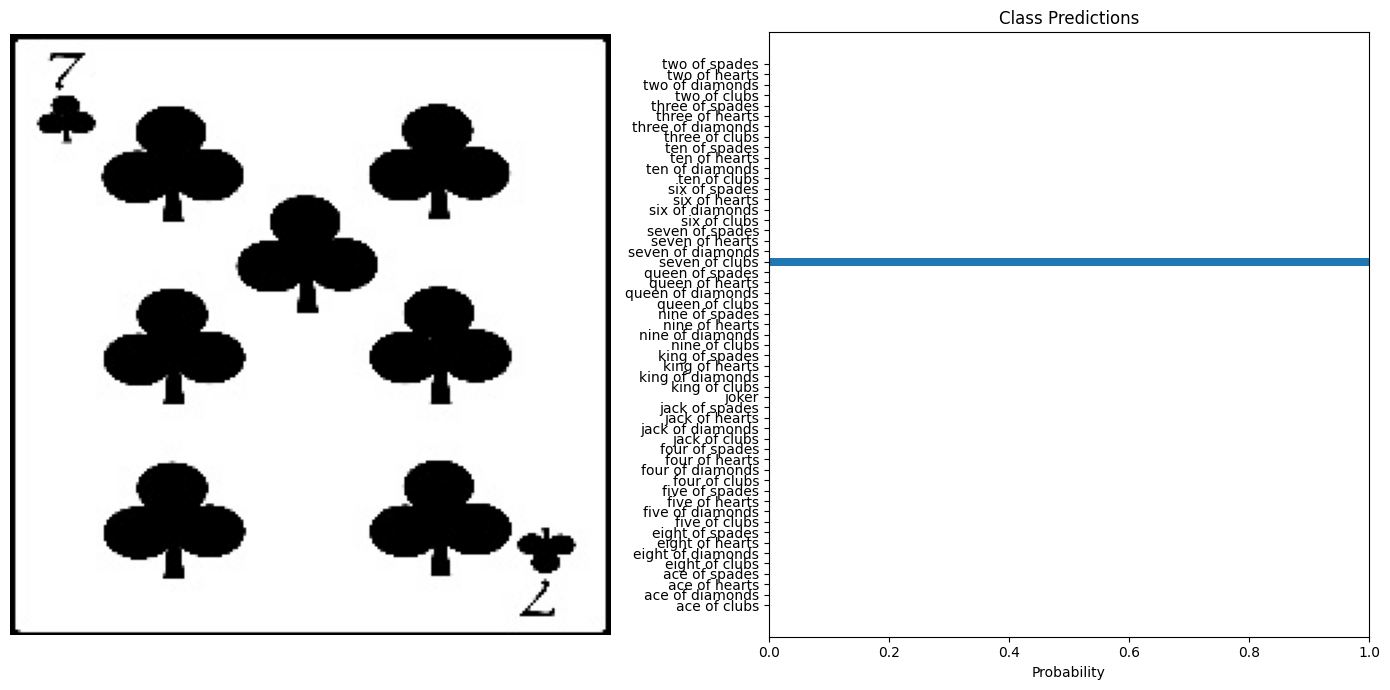

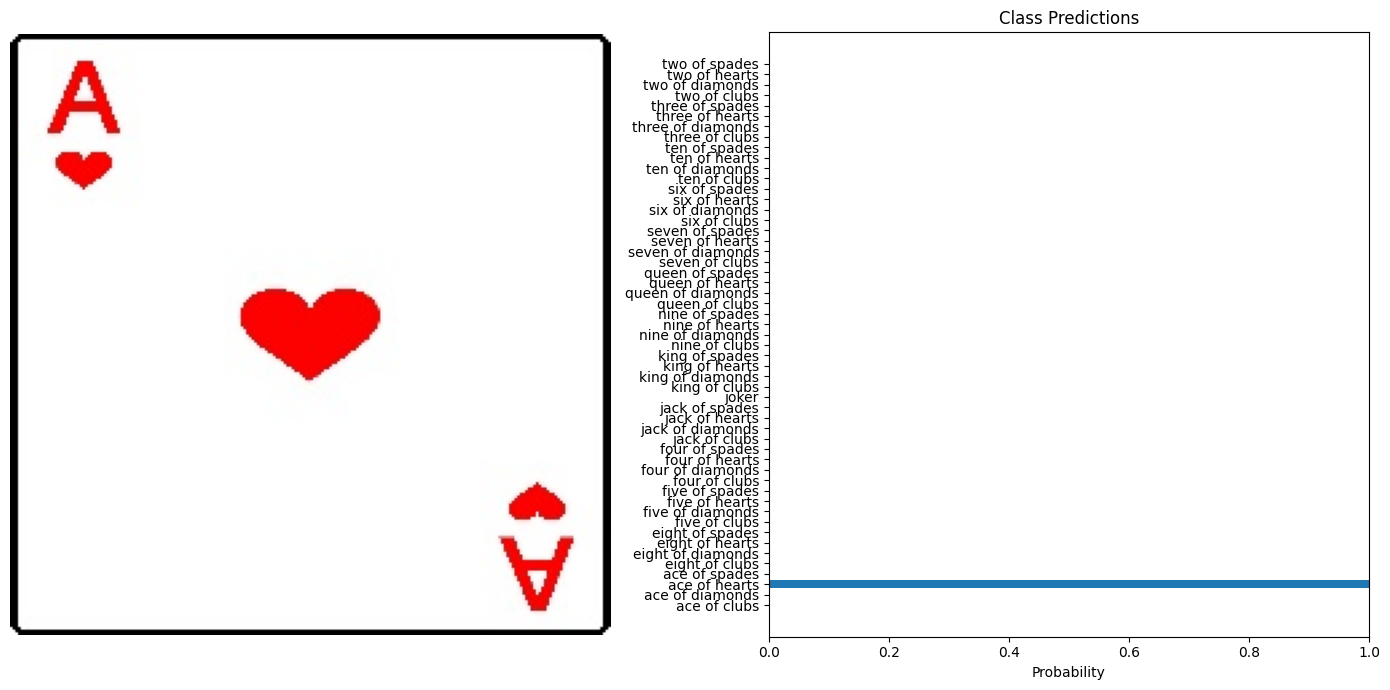

In [73]:
from glob import glob
test_images = glob('/Users/benas/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes 
    visualize_predictions(original_image, probabilities, class_names)